# U.S. Medical Insurance Costs

* Worldwide obesity has nearly tripled since 1975.
* In 2016, more than 1.9 billion adults, 18 years and older, were overweight. 
* Of these over 650 million were obese.
* In 2016, 39% of adults aged 18 years and over were overweight, and 13% were obese.
* Most of the world's population live in countries where overweight and obesity kills more people than underweight.
* 38 million children under the age of 5 were overweight or obese in 2019.
* Over 340 million children and adolescents aged 5-19 were overweight or obese in 2016.
* Obesity is preventable.

For adults, overweight and obesity as follows:

* overweight is a BMI greater than or equal to 25
* obesity is a BMI greater than or equal to 30.



Raised BMI is a major risk factor for noncommunicable diseases such as:

* cardiovascular diseases (mainly heart disease and stroke), which were the leading cause of death in 2012;
* diabetes;
* musculoskeletal disorders (especially osteoarthritis – a highly disabling degenerative disease of the joints);
* some cancers (including endometrial, breast, ovarian, prostate, liver, gallbladder, kidney, and colon).
The risk for these noncommunicable diseases increases, with increases in BMI.

Childhood obesity is associated with a higher chance of obesity, premature death and disability in adulthood. But in addition to increased future risks, obese children experience breathing difficulties, increased risk of fractures, hypertension, early markers of cardiovascular disease, insulin resistance and psychological effects.

This information from a website of World Health Organization [link WHO](https://www.who.int/news-room/fact-sheets/detail/obesity-and-overweight) that shows obesity is real, important and socially relevant.

In my project, I want to consider the dependence of the BMI on other factors, such as age, gender, the presence of children, region. 
Since a higher BMI can cause many diseases, insurance companies are interested in lowering it and making healthy their clients, reducing the risks of payments for the treatment of associated diseases. After analyzing the data, we will try to answer the question of how an insurance company can improve the overweight situation.
First of all , let's analyze the data in our datafile, check it for balance.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

df = pd.read_csv('insurance.csv')
df.index = range(1,1339)
print(df)

      age     sex     bmi  children smoker     region      charges
1      19  female  27.900         0    yes  southwest  16884.92400
2      18    male  33.770         1     no  southeast   1725.55230
3      28    male  33.000         3     no  southeast   4449.46200
4      33    male  22.705         0     no  northwest  21984.47061
5      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1334   50    male  30.970         3     no  northwest  10600.54830
1335   18  female  31.920         0     no  northeast   2205.98080
1336   18  female  36.850         0     no  southeast   1629.83350
1337   21  female  25.800         0     no  southwest   2007.94500
1338   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


Let's explore the data

In [2]:
def main_values(column): #function defines base values(min,max,average) for column
    
    min = df[column].min()
    max = df[column].max()
    mean = round(df[column].mean(),3)
    return '{}: minimum value is {}, maximum value is {}, average value is {}'.format(column,min,max,mean)

[main_values('age'), main_values('bmi'), main_values('charges'), main_values('children')]

['age: minimum value is 18, maximum value is 64, average value is 39.207',
 'bmi: minimum value is 15.96, maximum value is 53.13, average value is 30.663',
 'charges: minimum value is 1121.8739, maximum value is 63770.42801, average value is 13270.422',
 'children: minimum value is 0, maximum value is 5, average value is 1.095']

The data is broad enough.
For a more accurate analysis of the balance of the dataset by age, we select the categories: 18-25 years old, 26-35 years old, 36-45 years old, 46-55 years old, 56-65 years old

<BarContainer object of 5 artists>

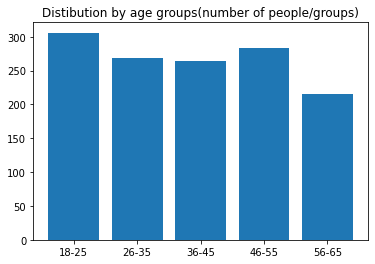

In [3]:
def age_groups(df): #function that makes ages categories
    groups = [0,0,0,0,0]
    for age in df['age']:
        if age <=25:
            groups[0]+=1
        elif age<=35:
            groups[1]+=1
        elif age<=45:
            groups[2]+=1
        elif age<=55:
            groups[3]+=1
        else:
            groups[4]+=1
    return [group for group in groups]
groups = ['18-25','26-35','36-45','46-55','56-65']
plt.title('Distibution by age groups(number of people/groups)')
plt.bar(groups,age_groups(df))


Looking at the visualization, we can say that our dataset is evenly distributed.  It often indicates the presence of special factors of variation. Therefore, the sample by age is preselected. Most likely this is done so that each age is represented in the sample equally.

We can say the same about the sample of the region.
On the pie chart we can see that almost equal numbers of people were taken from each region (in percentages)

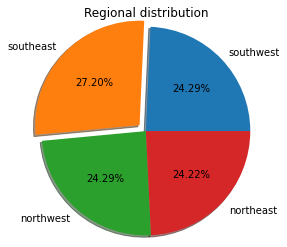

In [4]:
def region_distr(df):
    regions=[0,0,0,0]
    for region in df['region']:
        if region == 'southwest':
            regions[0]+=1
        if region == 'southeast':
            regions[1]+=1
        if region == 'northwest':
            regions[2]+=1
        if region == 'northeast':
            regions[3]+=1
    return [round(regions[i]*100/sum(regions),2) for i in range(len(regions))]
region_names = ["southwest","southeast","northwest","northeast"]
plt.title('Regional distribution')
plt.pie(region_distr(df), autopct='%.2f%%', radius = 1.2,
    explode = (0,0.1,0,0),shadow=True,labels=region_names)
plt.show()

The next step of the analysis is to check the balance of males and females in our data. 

In [5]:
def sex_distr(df):
    male=0
    female=0
    for sex in df['sex']:
        if sex=='male':
            male+=1
        else:
            female+=1 
    return 'This dataset is made up of about {}% females and {}% males'.format(round(female*100/(female+male),2),round(male*100/(female+male),2))
sex_distr(df)

'This dataset is made up of about 49.48% females and 50.52% males'

So, the data for insurance.csv is chosen so that people of different ages are equally represented, men and women are equally represented, and different regions are equally represented.
Let's look at the distribution graph of BMI

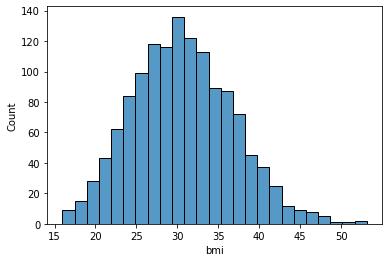

In [6]:
bmi = df["bmi"]
sns.histplot(bmi)
plt.show() 

BMIs has normal distribution. A random variable has normal distribution when it is influenced by a large number of random factors, which is a typical situation in data analysis.

After checking the balance of our data, let's start analyzing the data. Let's check if there is a problem with overweight.

In [7]:
main_values('bmi')

'bmi: minimum value is 15.96, maximum value is 53.13, average value is 30.663'

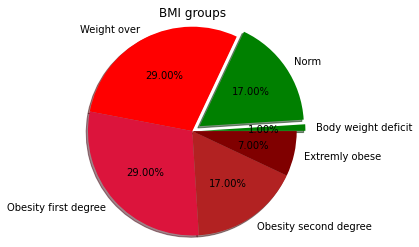

In [8]:
def bmi_groups(df):
    bmis = [0,0,0,0,0,0]
    for bmi in df['bmi']:
        if bmi<18.5:
            bmis[0]+=1
        elif bmi<25:
            bmis[1]+=1
        elif bmi<30:
            bmis[2]+=1
        elif bmi<35:
            bmis[3]+=1
        elif bmi<40:
            bmis[4]+=1
        elif bmi>=40:
            bmis[5]+=1
    return [round(bmi*100/sum(bmis)) for bmi in bmis]
bmi_group_names = ['Body weight deficit','Norm','Weight over','Obesity first degree','Obesity second degree','Extremly obese']
plt.title('BMI groups')
plt.pie(bmi_groups(df), autopct='%.2f%%', radius = 1.2,
    explode = (0.1,0.1,0,0,0,0),shadow=True,labels=bmi_group_names, colors = ['green','green','red','crimson','firebrick','maroon'])
plt.show()

As we can see, the problem of excess weight is relevant. The colors of the red tint indicate groups with weight problems. And only 18% of people from our sample have no problems with being overweight. 
Let's see if all regions are affected by this problem

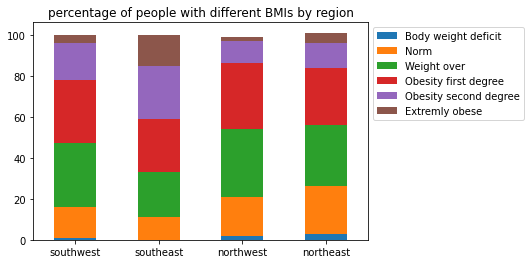

In [9]:
df_sw=df[df.region=='southwest'] #pick out dataframe of each region
df_se=df[df.region=='southeast']
df_nw=df[df.region=='northwest']
df_ne=df[df.region=='northeast']
data_bmi_groups = [bmi_groups(df_sw), bmi_groups(df_se), bmi_groups(df_nw), bmi_groups(df_ne)] 
df_bmi_groups = pd.DataFrame(data_bmi_groups)
df_bmi_groups.index = region_names
df_bmi_groups.columns = bmi_group_names
    
fig, ax = plt.subplots(1,1,figsize=(6,4))
df_bmi_groups.plot(kind='bar', stacked=True, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('percentage of people with different BMIs by region')
plt.show()

As we can see from the diagram, this problem affects all regions. The situation is a little better in northeast and northwest regions. For example, in the southeast, there are many people with extreme obesity(brown column), and the smallest percentage of people of normal weight(orange column). 

Let's look at BMI dependence on gender.

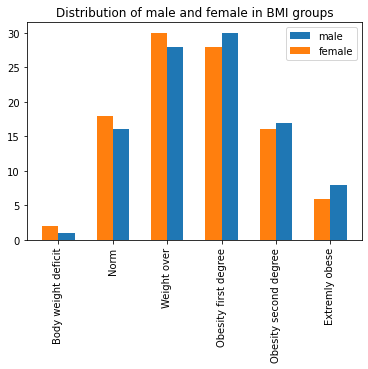

In [10]:
x = np.arange(len(bmi_group_names))
x1 = [i+0.15 for i in x]
x2 = [i-0.15 for i in x]
df_male = df[df.sex=='male']
df_female = df[df.sex=='female']
y1 = bmi_groups(df_male)
y2 = bmi_groups(df_female)
width = 0.3
fig, ax = plt.subplots()
ax.bar(x1, y1, width, label='male')
ax.bar(x2, y2, width, label='female')
ax.set_title('Distribution of male and female in BMI groups')
ax.set_xticks(x)
ax.set_xticklabels(bmi_group_names, rotation = 90)
ax.legend()

As we can see from this diagramm, men are more prone to obesity.

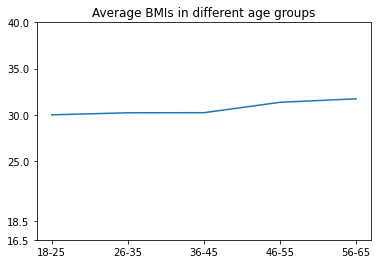

In [11]:
df_age_1 = df[df.age<=25]
df_age_2 = df[(df.age<=35)&(df.age>25)]
df_age_3 = df[(df.age<=45)&(df.age>35)]
df_age_4 = df[(df.age<=55)&(df.age>45)]
df_age_5 = df[(df.age<=65)&(df.age>55)]
average_bmi_in_group_of_age = [df_age_1['bmi'].mean(),df_age_2['bmi'].mean(),df_age_3['bmi'].mean(),df_age_4['bmi'].mean(),df_age_5['bmi'].mean()]
fig,ax = plt.subplots()
ax.plot(groups,average_bmi_in_group_of_age)
ax.set_yticks([16.5,18.5,25,30,35,40])
plt.title('Average BMIs in different age groups')
plt.show()
x = df["age"]
y = df["bmi"]


We see that with age, the average BMI remains almost at the same level, increases slightly after 45 years old

In [12]:
df_smoke_no = df[df.smoker == 'no']
df_smoke_yes = df[df.smoker == 'yes']
bmis_smoke = [round(df_smoke_no['bmi'].mean(),2),round(df_smoke_yes['bmi'].mean(),2)]
print("Average  BMI for nonsmokers and smokers"+str(bmis_smoke))

Average  BMI for non-smokers and smokers[30.65, 30.71]


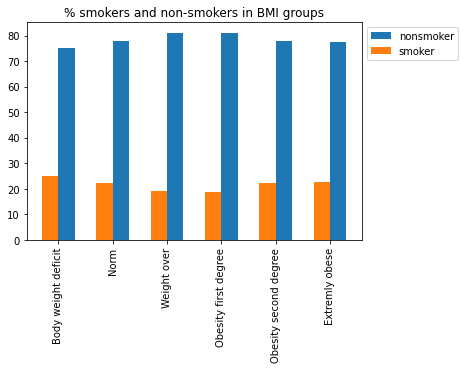

In [29]:
df_dw = df[df.bmi<18.5]
df_nw = df[(df.bmi<25) & (df.bmi>=18.5)]
df_ow = df[(df.bmi<30) & (df.bmi>=25)]
df_o1 = df[(df.bmi<35) & (df.bmi>=30)]
df_o2 = df[(df.bmi<40) & (df.bmi>=35)]
df_eo = df[(df.bmi<45) & (df.bmi>=40)]
def pr(group,arg):
    lst = list(group.groupby([arg])['bmi'].count())
    return [i*100/sum(lst) for i in lst]
x = np.arange(len(bmi_group_names))
x1 = [i+0.15 for i in x]
x2 = [i-0.15 for i in x]
for i in range(2):
    y[i] = [pr(df_dw,'smoker')[i],pr(df_nw,'smoker')[i],pr(df_ow,'smoker')[i],
            pr(df_o1,'smoker')[i],pr(df_o2,'smoker')[i],pr(df_eo,'smoker')[i]]
width = 0.3
fig, ax = plt.subplots()
ax.bar(x1, y[0], width, label='nonsmoker')
ax.bar(x2, y[1], width, label='smoker')
ax.set_title('% smokers and nonsmokers in BMI groups')
ax.set_xticks(x)
ax.set_xticklabels(bmi_group_names, rotation = 90)
ax.legend(bbox_to_anchor=(1, 1))


This chart shows the percentage of nonsmokers / nonsmokers for each BMI group. As we see in each group, about 20-25% are smokers and 75-80% are non-smokers. In groups Weight over and Obesity 1degree, the balance shifts in favor of non-smokers (smokers less then 20%).

So, let's summarize. 
* The BMI has a normal distribution, which indicates quality, balanced data. 
* People in the southeast and southwest are more likely to be obese and have more weight problems than people in the northeast and northwest.
* BMI slightly increases with age
* Men are more prone to obesity
* Does not depend on a person's tendency to smoke.
* The problem of being overweight is real! 

Now let's look at how the BMI affects insurance charges.
Next images below show the charges charged for the people with different BMI’s.

Slope coefficients of straight lines for smokers 1473.11 and nonsmokers 83.35


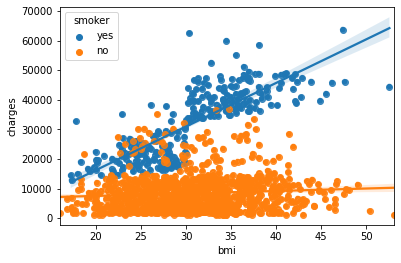

In [14]:
fig,ax = plt.subplots()
sns.scatterplot(x = df.bmi,y = df.charges, hue = df.smoker)
sns.regplot(x = df[df.smoker=='yes'].bmi,y = df[df.smoker=='yes'].charges)
sns.regplot(x = df[df.smoker=='no'].bmi,y = df[df.smoker=='no'].charges)
A1 = np.vstack([df[df.smoker=='yes'].bmi,np.ones(len(df[df.smoker=='yes'].bmi))]).T
m1,c1 = np.linalg.lstsq(A1,df[df.smoker=='yes'].charges,rcond=None)[0]
A0 = np.vstack([df[df.smoker=='no'].bmi,np.ones(len(df[df.smoker=='no'].bmi))]).T
m0,c0 = np.linalg.lstsq(A0,df[df.smoker=='no'].charges,rcond=None)[0]
print("Slope coefficients of straight lines for smokers {} and nonsmokers {}".format(round(m1,2),round(m0,2)))

plt.show()


At this one we can see scatter chart that shows a big increase in charges for smokers with high BMI(people with obesity).
As we can see, for nonsmokers, the BMI does not greatly affect insurance premiums (the regression line is almost horizontal).

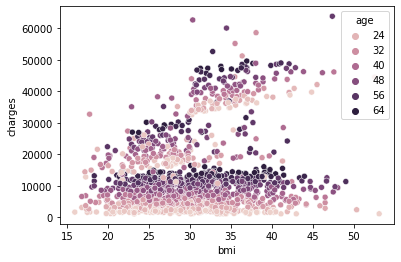

In [15]:
fig,ax = plt.subplots()
sns.scatterplot(x = df.bmi,y = df.charges,hue = df.age)
plt.show()

On this scatter chart we see that as age goes up charges also trends up (dark dots on the chart).

For a better understanding of how the model for calculating insurance charges are built, I looked at groups of people with the same data (except the BMI and charges).

In [16]:
def find_same_person(df): 
    df_0 = df[df.index==0]
    for i in range(1338):
        df_i= df.iloc[i]
        df_new_i=df[(df.age==df_i.age) & (df.children==df_i.children) & (df.bmi == df_i.bmi) &
                (df.smoker == df_i.smoker) & (df.sex == df_i.sex) & (df.region == df_i.region) ]
        if len(df_new_i)>=2:
            df_0 = df_0.append(df_new_i)
    return df_0.drop_duplicates()
find_same_person(df)

,age,sex,bmi,children,smoker,region,charges
103,18,female,30.115,0,no,northeast,21344.84670
472,18,female,30.115,0,no,northeast,2203.47185
182,18,female,38.280,0,no,southeast,1631.82120
355,18,female,38.280,0,no,southeast,14133.03775
196,19,male,30.590,0,no,northwest,1639.56310


This function finds exactly the same people (except charges).The strange thing is that charges for these people are different.  ("196	19	male	30.590	0	no	northwest	1639.56310"  is in list because it is repeated twice in the data). We can assume that this is either an error in the data, or there is a parameter that is not reflected in our data, but is included in the calculation of charges.

While looking for similar people with different BMIs, I came across another oddity in the data. In the table below, you can see people with the same data except BMI. Most of them have charges slightly different from each other, but there are people whose charges are greatly increased, although it is not clear from the data in the table. Again, the assumption works: either this is an error in the data, or there is another parameter that affects the contributions, but is not indicated in our data file.

In [28]:
def depend_bmi_charges(df): 
    for i in range(1338):
        df_i= df.iloc[i]
        df_new = df[(df.age==df_i.age) & (df.children==df_i.children) &
                (df.smoker == df_i.smoker) & (df.sex == df_i.sex) & 
                (df.region == df_i.region) ]
    
        if len(df_new)>=2:
            A = np.vstack([df_new.bmi,np.ones(len(df_new.bmi))]).T
            m,c = np.linalg.lstsq(A,df_new.charges,rcond=None)[0]
            if m<0:
                print(df_new,round(m,2))
depend_bmi_charges(df)

      age     sex     bmi  children smoker     region       charges
32     18  female  26.315         0     no  northeast   2198.189850
51     18  female  35.625         0     no  northeast   2211.130750
103    18  female  30.115         0     no  northeast  21344.846700
428    18  female  29.165         0     no  northeast   7323.734819
472    18  female  30.115         0     no  northeast   2203.471850
493    18  female  25.080         0     no  northeast   2196.473200
613    18  female  33.155         0     no  northeast   2207.697450
729    18  female  40.280         0     no  northeast   2217.601200
943    18  female  40.185         0     no  northeast   2217.469150
1151   18  female  30.305         0     no  northeast   2203.735950
1164   18  female  28.215         0     no  northeast   2200.830850
1335   18  female  31.920         0     no  northeast   2205.980800 -164.83
      age   sex   bmi  children smoker     region      charges
40     60  male  39.9         0    yes  south

     age   sex    bmi  children smoker     region      charges
246   54  male  30.02         0     no  northwest  24476.47851
545   54  male  30.21         0     no  northwest  10231.49990 -74973.57
      age   sex    bmi  children smoker     region      charges
583    39  male  45.43         2     no  southeast   6356.27070
1144   39  male  32.34         2     no  southeast   6338.07560
1212   39  male  34.10         2     no  southeast  23563.01618 -542.9
      age     sex    bmi  children smoker     region      charges
584    32  female  23.65         1     no  southeast  17626.23951
1076   32  female  29.59         1     no  southeast   4562.84210 -2199.23
      age     sex     bmi  children smoker     region       charges
32     18  female  26.315         0     no  northeast   2198.189850
51     18  female  35.625         0     no  northeast   2211.130750
103    18  female  30.115         0     no  northeast  21344.846700
428    18  female  29.165         0     no  northeast   732

      age   sex    bmi  children smoker     region      charges
583    39  male  45.43         2     no  southeast   6356.27070
1144   39  male  32.34         2     no  southeast   6338.07560
1212   39  male  34.10         2     no  southeast  23563.01618 -542.9
      age     sex    bmi  children smoker     region      charges
859    25  female  32.23         1     no  southeast  18218.16139
1100   25  female  33.99         1     no  southeast   3227.12110
1240   25  female  42.13         1     no  southeast   3238.43570 -1043.16
      age   sex     bmi  children smoker     region      charges
477    24  male  28.500         0    yes  northeast  35147.52848
1251   24  male  29.830         0    yes  northeast  18648.42170
1268   24  male  31.065         0    yes  northeast  34254.05335 -502.63
      age   sex     bmi  children smoker     region      charges
477    24  male  28.500         0    yes  northeast  35147.52848
1251   24  male  29.830         0    yes  northeast  18648.42170
1

In order to use our data file for making a prediction model in the future, I would advise to either delete this data or correct it.

It seems to me, due to the serious situation of being overweight, the insurance company should increase charges for people with an BMI above 30. To assess this hypothesis, we need to obtain data of insurance payments for treatment of these people.
With insurance, people should receive information about how much their charges will decrease if they lower their BMI to healthy level and also if they quit smoking. This encourages people to lead healthy lives.